In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd 
import seaborn as sns
import sklearn                  

## Task

**Classification stars, galaxies, and quasars based on their spectral characteristics**

## 1. Loading data


In [17]:
url = 'star_classification.csv'
data = pd.read_csv(url)

**Content**

The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

1. obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2. alpha = Right Ascension angle (at J2000 epoch)
3. delta = Declination angle (at J2000 epoch)
4. u = Ultraviolet filter in the photometric system
5. g = Green filter in the photometric system
6. r = Red filter in the photometric system
7. i = Near Infrared filter in the photometric system
8. z = Infrared filter in the photometric system
9. run_ID = Run Number used to identify the specific scan
10. rereun_ID = Rerun Number to specify how the image was processed
11. cam_col = Camera column to identify the scanline within the run
12. field_ID = Field number to identify each field
13. spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14. class = object class (galaxy, star or quasar object)
15. redshift = redshift value based on the increase in wavelength
16. plate = plate ID, identifies each plate in SDSS
17. MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18. fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation


In [18]:
type(data)

pandas.core.frame.DataFrame

In [19]:
data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [20]:
print(data)

             obj_ID       alpha      delta         u         g         r  \
0      1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0      

In [27]:
data.colums = ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r',
              'i', 'z', 'run_ID', 'rerun_ID', 'cam_col',
              'field_ID', 'spec_obj_ID', 'class', 
              'redshift', 'plate', 'MJD', 'fiber_ID']

In [23]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [24]:
data.tail()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470
99999,1.237661e+18,196.896053,49.464643,22.62171,21.79745,20.60115,20.00959,19.28075,3650,301,4,60,8.343152e+18,GALAXY,0.542944,7410,57104,851


In [28]:
print(data.shape)
print(data.colums)

(100000, 18)
['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate', 'MJD', 'fiber_ID']


In [29]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


## 2. Visualization

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 301.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 301.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 301.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


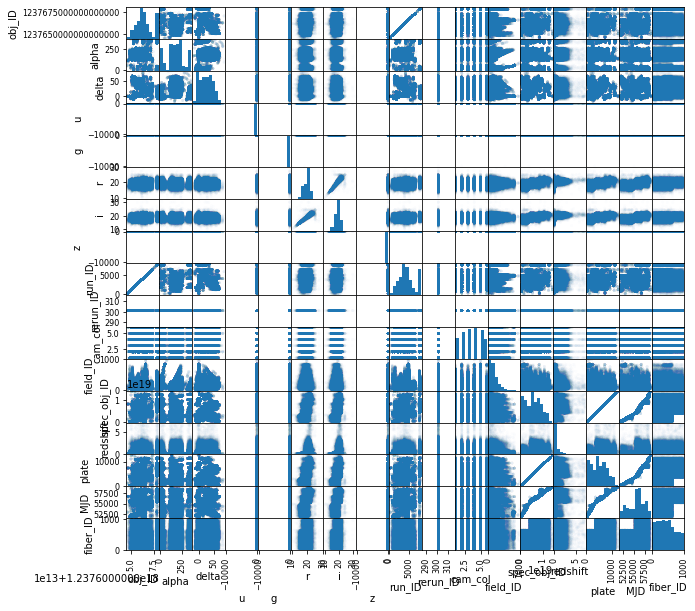

In [30]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10,10))
pass

In [31]:
data.corr()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,NaN,-0.046997,0.031498,0.239461,0.065400,0.239460,0.262687,0.067178
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,NaN,0.019582,-0.165577,-0.002553,0.001667,-0.002554,0.019943,0.030464
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,NaN,0.032565,-0.173416,0.112329,0.031638,0.112329,0.107333,0.028250
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,NaN,0.003548,-0.008374,0.029997,0.014309,0.029997,0.031997,0.016305
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,NaN,0.003508,-0.008852,0.039443,0.022954,0.039443,0.040274,0.017470
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,NaN,0.008480,-0.026423,0.655245,0.433241,0.655243,0.671180,0.223106
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,NaN,0.007615,-0.026679,0.661641,0.492383,0.661640,0.672523,0.214787
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,NaN,0.003365,-0.008903,0.037813,0.030380,0.037813,0.037469,0.014668
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,NaN,-0.047098,0.031498,0.239460,0.065400,0.239459,0.262687,0.067165
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


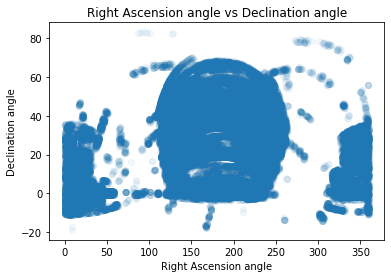

In [32]:
plt.plot(data['alpha'], data['delta'], 'o', alpha = 0.05)
plt.xlabel('Right Ascension angle')
plt.ylabel('Declination angle')
plt.title('Right Ascension angle vs Declination angle')
pass

In [35]:
data['class'] == 'GALAXY'

0        True
1        True
2        True
3        True
4        True
         ... 
99995    True
99996    True
99997    True
99998    True
99999    True
Name: class, Length: 100000, dtype: bool

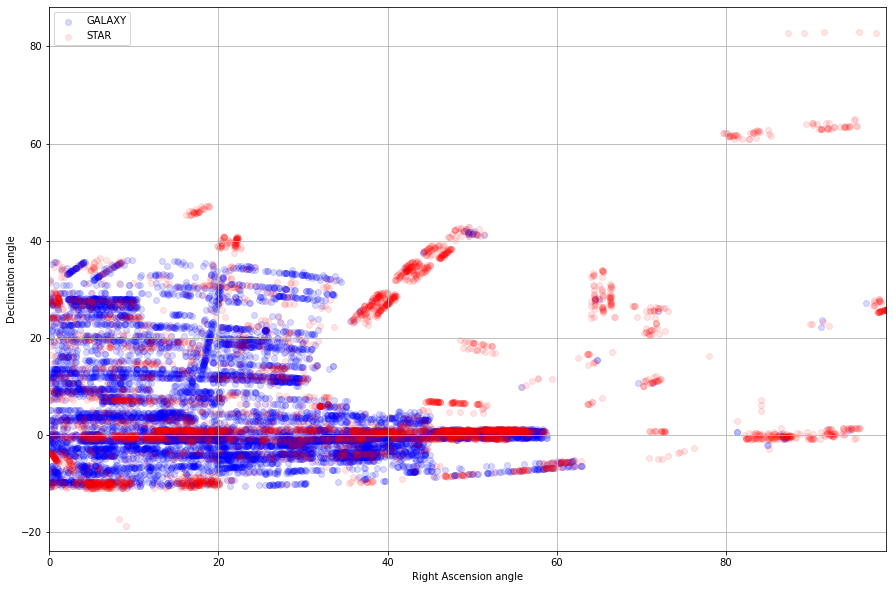

In [44]:
plt.figure(figsize = (15, 10))

plt.scatter(data[data['class'] == 'GALAXY']['alpha'],
            data[data['class'] == 'GALAXY']['delta'],
            alpha = 0.15,
            label = 'GALAXY',
            color = 'b')

plt.scatter(data[data['class'] == 'STAR']['alpha'],
            data[data['class'] == 'STAR']['delta'],
            alpha = 0.1,
            label = 'STAR',
            color = 'r')

plt.xlabel('Right Ascension angle')
plt.xlim(0, 99)
plt.ylabel('Declination angle')
plt.legend()
plt.grid()

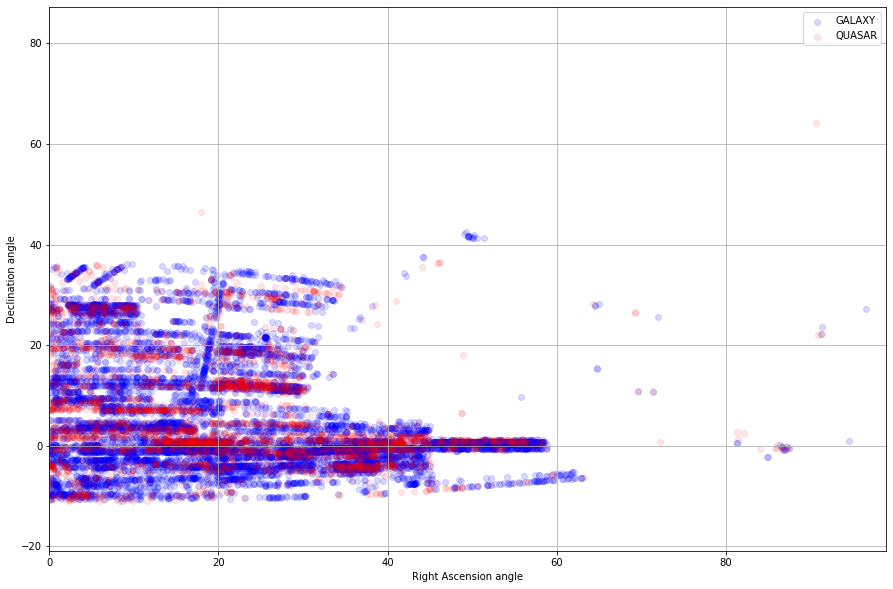

In [49]:
plt.figure(figsize = (15, 10))

plt.scatter(data[data['class'] == 'GALAXY']['alpha'],
            data[data['class'] == 'GALAXY']['delta'],
            alpha = 0.15,
            label = 'GALAXY',
            color = 'b')

plt.scatter(data[data['class'] == 'QSO']['alpha'],
            data[data['class'] == 'QSO']['delta'],
            alpha = 0.1,
            label = 'QUASAR',
            color = 'r')

plt.xlabel('Right Ascension angle')
plt.xlim(0, 99)
plt.ylabel('Declination angle')
plt.legend()
plt.grid()

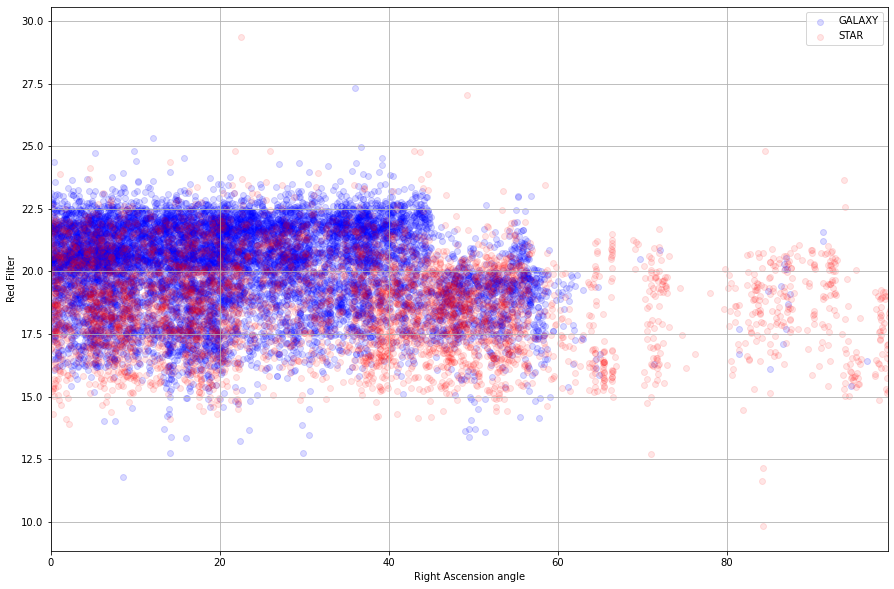

In [45]:
plt.figure(figsize = (15, 10))

plt.scatter(data[data['class'] == 'GALAXY']['alpha'],
            data[data['class'] == 'GALAXY']['r'],
            alpha = 0.15,
            label = 'GALAXY',
            color = 'b')

plt.scatter(data[data['class'] == 'STAR']['alpha'],
            data[data['class'] == 'STAR']['r'],
            alpha = 0.1,
            label = 'STAR',
            color = 'r')

plt.xlabel('Right Ascension angle')
plt.xlim(0, 99)
plt.ylabel('Red Filter')
plt.legend()
plt.grid()

In [50]:
data.describe(include = ['object'])

,class
count,100000
unique,3
top,GALAXY
freq,59445


In [51]:
data.describe(include = 'all')

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GALAXY,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59445,NaN,NaN,NaN,NaN
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,NaN,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,NaN,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,NaN,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,NaN,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,NaN,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,NaN,0.704154,7400.250000,56777.000000,645.000000


In [52]:
data['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [53]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['class']
['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate', 'MJD', 'fiber_ID']


In [54]:
for c in categorical_columns:
    print(c, data[c].unique())

class ['GALAXY' 'QSO' 'STAR']


## 3. Processing missing values

In [55]:
data.median(axis = 0)

/var/folders/jp/mclr5crx6z53k9zh4w2blkvr0000gn/T/ipykernel_15784/413672352.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median(axis = 0)


obj_ID         1.237663e+18
alpha          1.809007e+02
delta          2.364592e+01
u              2.217914e+01
g              2.109983e+01
r              2.012529e+01
i              1.940514e+01
z              1.900460e+01
run_ID         4.188000e+03
rerun_ID       3.010000e+02
cam_col        4.000000e+00
field_ID       1.460000e+02
spec_obj_ID    5.614883e+18
redshift       4.241733e-01
plate          4.987000e+03
MJD            5.586850e+04
fiber_ID       4.330000e+02
dtype: float64

In [56]:
data = data.fillna(data.median(axis = 0), axis = 0)

/var/folders/jp/mclr5crx6z53k9zh4w2blkvr0000gn/T/ipykernel_15784/2282753498.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median(axis = 0), axis = 0)


In [57]:
data[numerical_columns].count(axis = 0)

obj_ID         100000
alpha          100000
delta          100000
u              100000
g              100000
r              100000
i              100000
z              100000
run_ID         100000
rerun_ID       100000
cam_col        100000
field_ID       100000
spec_obj_ID    100000
redshift       100000
plate          100000
MJD            100000
fiber_ID       100000
dtype: int64

In [58]:
data[categorical_columns].count(axis = 0)

class    100000
dtype: int64

In [59]:
data['class'].describe()

count     100000
unique         3
top       GALAXY
freq       59445
Name: class, dtype: object

In [ ]:
data.loc[data.class == "?", 'class'] = None

In [60]:
data.describe(include = [object])

,class
count,100000
unique,3
top,GALAXY
freq,59445


In [68]:
type(data['class'].describe())

pandas.core.series.Series

In [70]:
data['class'].describe().top

'GALAXY'

In [76]:
data['class'] = data['class'].fillna('GALAXY')

In [77]:
data.describe(include = [object])

,class
count,100000
unique,3
top,GALAXY
freq,59445


In [78]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [79]:
data.describe(include = [object])

,class
count,100000
unique,3
top,GALAXY
freq,59445


## 4. Processing of categorical features


In [80]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['class']


In [81]:
data['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [82]:
data[nonbinary_columns]

,class
0,GALAXY
1,GALAXY
2,GALAXY
3,GALAXY
4,GALAXY
...,...
99995,GALAXY
99996,GALAXY
99997,GALAXY
99998,GALAXY


In [83]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['class_GALAXY', 'class_QSO', 'class_STAR'], dtype='object')


In [84]:
len(data_nonbinary.columns)

3

## 5. Normalization of Quantitative Features

In [85]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [86]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [87]:
data_numerical.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,0.0,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,3.866687e-08,-2.897580e-14,-1.175645e-14,5.618405e-15,-1.704142e-16,-4.173395e-14,8.259666e-14,9.964117e-16,2.296352e-15,NaN,1.599975e-15,-2.537215e-16,-1.570015e-12,-5.483126e-15,-2.331579e-17,7.216039e-16,-1.576517e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.225369e+00,-1.840616e+00,-2.184849e+00,-3.154298e+02,-3.155729e+02,-5.296477e+00,-5.469583e+00,-3.157344e+02,-2.225389e+00,NaN,-1.582703e+00,-1.175285e+00,-1.649921e+00,-8.028269e-01,-1.649901e+00,-2.201096e+00,-1.645194e+00
25%,-6.589536e-01,-5.192718e-01,-9.666000e-01,-5.124810e-02,-4.932732e-02,-8.140864e-01,-7.694256e-01,-3.807763e-02,-6.587894e-01,NaN,-9.525480e-01,-6.988106e-01,-8.843954e-01,-7.145734e-01,-8.843975e-01,-7.490513e-01,-8.378498e-01
50%,-1.491570e-01,3.390163e-02,-2.491171e-02,6.253420e-03,1.790371e-02,2.585391e-01,1.822013e-01,1.058318e-02,-1.493136e-01,NaN,3.077612e-01,-2.693123e-01,-5.084186e-02,-2.086849e-01,-5.081106e-02,1.547442e-01,-5.986362e-02
75%,4.299871e-01,5.830527e-01,8.025713e-01,5.373024e-02,5.015326e-02,7.542879e-01,7.461429e-01,3.946999e-02,4.298907e-01,NaN,9.379158e-01,3.682242e-01,7.666214e-01,1.744796e-01,7.666016e-01,6.570986e-01,7.181226e-01
max,1.873488e+00,1.889808e+00,2.996499e+00,3.399799e-01,3.486851e-01,5.351689e+00,7.427416e+00,3.377105e-01,1.873321e+00,NaN,1.568070e+00,5.387985e+00,2.509933e+00,8.805967e+00,2.509901e+00,1.848704e+00,2.020883e+00


## 6. Data partitioning

In [101]:
X = data.drop('class', axis = 1)
y = data['class']
feature_names = X.columns

In [102]:
type(feature_names)

pandas.core.indexes.base.Index

In [103]:
feature_names

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate',
       'MJD', 'fiber_ID'],
      dtype='object')

In [104]:
X = X.to_numpy()

In [105]:
y = np.array(y != 'GALAXY', dtype='int')

In [106]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
print(X.shape)
print(y.shape)
N, d = X.shape

(100000, 17)
(100000,)


In [108]:
type(X)

numpy.ndarray

In [109]:
type(y)

numpy.ndarray

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

70000 30000


## 7. _k_NN

In [111]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [112]:
knn

KNeighborsClassifier(n_neighbors=10)

In [113]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [114]:
err_test

0.24843333333333334

In [115]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[15594  2251]
 [ 5202  6953]]


In [116]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]])

## 8. Error calculation

let's try two options

In [117]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.24711428571428573 10


In [118]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.20985714285714285 0.24843333333333334


**Test error = 0.21,
Train error = 0.25**

##  9. Let's try another classifier - SVC

In [120]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)


0.0 0.4051666666666667


## 10. Conclusions

Solve the classification problem in two different ways i got the best results for the _k_NN method